In [52]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms, datasets
import torch.utils.data as tud
import torch.optim as optim 
import matplotlib.pyplot as plt

import imageio
import numpy as np

from torchvision.utils import make_grid, save_image
from tqdm import tqdm


In [53]:
batch_size = 64

mnist_data = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),]))

mnist_data_loader = tud.DataLoader(dataset = mnist_data, batch_size=batch_size, shuffle=True)


In [54]:
for data in mnist_data_loader:
    #print(data)
    break
    
    
    
data_iter = iter(mnist_data_loader)
images, labels = data_iter.next()
print(torch.min(images), torch.max(images)) #check the data bounds, depends on the normalization 
#defined in the transforms, to then use a sigmoid for default bounds 0-1 and tanh for a normalization
#of 0.5 std and mn 

tensor(-1.) tensor(1.)


tensor(1)

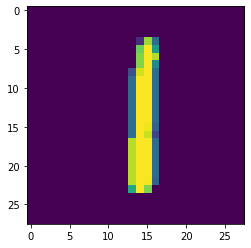

In [55]:
plt.imshow(data[0][63].view(28,28))
data[1][63]

In [60]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128), # (BS,784) --> (BS,128)
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12), 
            nn.ReLU(),
            nn.Linear(12, 3)     #output BS x 3   
        )
        
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12), 
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128), 
            nn.ReLU(),
            nn.Linear(128, 28*28),     #output BS x 784   
            nn.Tanh()
        )
        
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [61]:
lr = 0.003
weight_decay = 0.00005
AE = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(AE.parameters(), lr = lr) #w/o weight_decay

In [62]:
#def save_ae_image(image, path):
    #save_image(image, path)

100%|██████████| 938/938 [00:26<00:00, 35.50it/s]


Epoch 0 of 15
loss: 0.1393


100%|██████████| 938/938 [00:26<00:00, 35.10it/s]


Epoch 1 of 15
loss: 0.1198


100%|██████████| 938/938 [00:27<00:00, 34.58it/s]


Epoch 2 of 15
loss: 0.1332


100%|██████████| 938/938 [00:26<00:00, 35.01it/s]


Epoch 3 of 15
loss: 0.1117


100%|██████████| 938/938 [00:27<00:00, 34.66it/s]


Epoch 4 of 15
loss: 0.1157


100%|██████████| 938/938 [00:27<00:00, 34.17it/s]


Epoch 5 of 15
loss: 0.1240


100%|██████████| 938/938 [00:29<00:00, 31.47it/s]


Epoch 6 of 15
loss: 0.1225


100%|██████████| 938/938 [00:28<00:00, 32.55it/s]


Epoch 7 of 15
loss: 0.1330


100%|██████████| 938/938 [00:28<00:00, 33.38it/s]


Epoch 8 of 15
loss: 0.1314


100%|██████████| 938/938 [00:30<00:00, 30.59it/s]


Epoch 9 of 15
loss: 0.1187


100%|██████████| 938/938 [00:29<00:00, 32.08it/s]


Epoch 10 of 15
loss: 0.1303


100%|██████████| 938/938 [00:26<00:00, 34.81it/s]


Epoch 11 of 15
loss: 0.1240


100%|██████████| 938/938 [00:28<00:00, 33.05it/s]


Epoch 12 of 15
loss: 0.1241


100%|██████████| 938/938 [00:27<00:00, 34.04it/s]


Epoch 13 of 15
loss: 0.1514


100%|██████████| 938/938 [00:28<00:00, 33.32it/s]

Epoch 14 of 15
loss: 0.1314


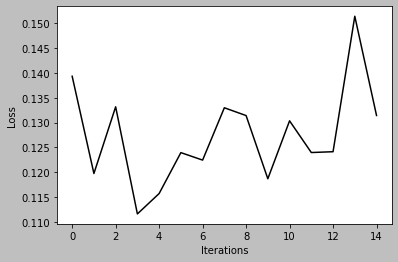

In [83]:
epochs = 15
outputs = []
img = []
ae_loss = []
for epoch in range(epochs):
    for (image,_) in tqdm(mnist_data_loader):
        image = image.view(-1, 28*28)
        reconstructed = AE(image)
        loss = criterion(reconstructed, image)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #print(f'epoch:{epoch+1}, loss:{loss.item():.4f}')
    print(f"Epoch {epoch} of {epochs}")
    print(f"loss: {loss.item():.4f}")
    outputs.append((epoch, image, reconstructed))
    ae_loss.append(loss)     
                          
                          
                          
    #ae_img = AE(image).detach()
    #ae_img = make_grid(generated_img)
    #save_ae_image(ae_img, f"{epoch}.png")
    #img.append(ae_img)
    
    
plt.style.use('grayscale')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.plot(ae_loss)


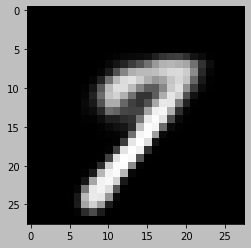

In [84]:
#plotting the corresponding original image
for i, item in enumerate(image):  
  item = item.view(-1, 28, 28).detach()
  plt.imshow(item[0])

#plotting the image generated by the AE
for i, item in enumerate(reconstructed):
  item = item.view(-1, 28, 28).detach()
  plt.imshow(item[0])

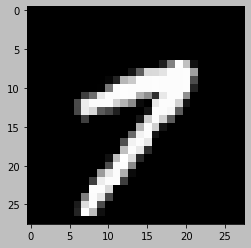

In [85]:
#plotting the corresponding original image
for i, item in enumerate(image):  
  item = item.view(-1, 28, 28).detach()
  plt.imshow(item[0])


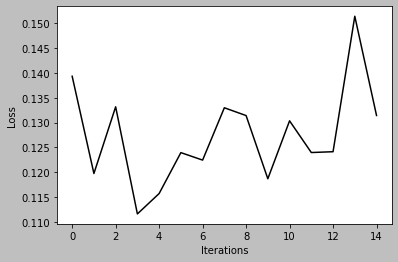

In [86]:
plt.style.use('grayscale')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.plot(ae_loss)